In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from tqdm.notebook import tqdm

In [3]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment, InkLibrary
from chromalab.spectra import Spectra, Illuminant

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [5]:
wavelengths4 = np.arange(380, 781, 4)

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
elevator_illuminant = Spectra(data=np.load(f'../data/illuminants/elevator.npy'),wavelengths=wavelengths4)\
.interpolate_values(wavelengths10)

In [8]:
elevator_illuminant.data.shape

(31,)

In [12]:
metamers['E-out'].data.shape

(31,)

In [13]:
trichromat = Observer.trichromat()
tetrachromat = Observer.tetrachromat()

In [14]:
s_m530_m533_q545_q547_l555_559 = Observer([Cone.s_cone(), Cone.cone(530), Cone.cone(533),\
                                           Cone.cone(545), Cone.cone(547), Cone.cone(555), Cone.cone(559)],
                                         illuminant=elevator_illuminant)

In [15]:
q47 = Cone.cone(547)

In [16]:
q45 = Cone.cone(545)

In [17]:
tetrachromat_q45_elevator = Observer([Cone.s_cone(), Cone.m_cone(), q45, Cone.l_cone()], illuminant=elevator_illuminant)

In [18]:
tetrachromat_q47_elevator = Observer([Cone.s_cone(), Cone.m_cone(), q47, Cone.l_cone()], illuminant=elevator_illuminant)

In [19]:
metamers = {}
with open(f'../data/nix/26.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        metamers[name] = spectra

In [11]:
metamers

{'E-out': <chromalab.spectra.Spectra at 0x295a07410>,
 'E-in': <chromalab.spectra.Spectra at 0x297698510>,
 'L-out': <chromalab.spectra.Spectra at 0x2966febd0>,
 'L-in': <chromalab.spectra.Spectra at 0x2975b7290>,
 'A-out': <chromalab.spectra.Spectra at 0x29554cc10>,
 'A-in': <chromalab.spectra.Spectra at 0x2976a15d0>}

In [ ]:
del tetrachromat_q47

# E Plate

In [20]:
tetrachromat_q45_elevator.observe(metamers['E-out'])

array([ 0.19455366,  0.29666147,  0.32223962,  0.34531427])

In [21]:
tetrachromat_q45_elevator.observe(metamers['E-in'])

array([ 0.25567721,  0.31010955,  0.33950102,  0.35544714])

In [22]:
tetrachromat_q47_elevator.observe(metamers['E-out'])

array([ 0.19455366,  0.29666147,  0.32565614,  0.34531427])

In [23]:
tetrachromat_q47_elevator.observe(metamers['E-in'])

array([ 0.25567721,  0.31010955,  0.34244799,  0.35544714])

In [24]:
s_m530_m533_q545_q547_l555_559.observe(metamers['E-out'])

array([ 0.19455366,  0.3005003 ,  0.30421215,  0.32223962,  0.32565614,
        0.34015589,  0.34777326])

In [25]:
s_m530_m533_q545_q547_l555_559.observe(metamers['E-in'])

array([ 0.25567721,  0.31480737,  0.32012257,  0.33950102,  0.34244799,
        0.35351482,  0.35865736])

# L plate

In [26]:
tetrachromat_q45_elevator.observe(metamers['L-out'])

array([ 0.19290297,  0.2527732 ,  0.27708274,  0.30001846])

In [ ]:
tetrachromat_q45_elevator.observe(metamers['L-in'])

In [ ]:
tetrachromat_q47_elevator.observe(metamers['L-out'])

In [ ]:
tetrachromat_q47_elevator.observe(metamers['L-in'])

In [ ]:
s_m530_m533_q545_q547_l555_559.observe(metamers['L-out'])

In [ ]:
s_m530_m533_q545_q547_l555_559.observe(metamers['L-in'])

# A plate

In [ ]:
tetrachromat_q45_elevator.observe(metamers['A-out'])

In [ ]:
tetrachromat_q45_elevator.observe(metamers['A-in'])

In [ ]:
tetrachromat_q47_elevator.observe(metamers['A-out'])

In [ ]:
tetrachromat_q47_elevator.observe(metamers['A-in'])

In [ ]:
s_m530_m533_q545_q547_l555_559.observe(metamers['A-out'])

In [ ]:
s_m530_m533_q545_q547_l555_559.observe(metamers['A-in'])

In [29]:
inks25 = {}
with open(f'../data/nix/25Lamy.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        inks25[name] = spectra
        

/Users/varun/Documents/Python/ChromaLab/chromalab/spectra.py:35: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


In [30]:
d65 = Illuminant.get('d65')

In [31]:
lvtcm = Neugebauer(inks25, n=0.94)

In [32]:
lvtcm_gamut = InkGamut(lvtcm, illuminant=d65)

In [33]:
tetrachromat_s_m530_q545_l555 = Observer([Cone.s_cone(), Cone.m_cone(), \
                                          Cone.cone(545), Cone.cone(555)])

In [34]:
tetrachromat_s_m530_q545_l559 = Observer([Cone.s_cone(), Cone.m_cone(), \
                                          Cone.cone(545), Cone.cone(559)])

In [35]:
metamers_ser180 = lvtcm_gamut.get_buckets(tetrachromat_s_m530_q545_l559, stepsize=0.05)

Generating point cloud: 41it [00:10,  3.84it/s]                                                 


Point cloud generated.


In [36]:
metamers_ala180 = lvtcm_gamut.get_buckets(tetrachromat_s_m530_q545_l555, stepsize=0.05)

Generating point cloud: 41it [00:11,  3.57it/s]                                                 


Point cloud generated.


In [44]:
for _, (p1, p2) in metamers_ala180[:4]:
#     print(100*np.array(p1), 100*np.array(p2))
    print(100*np.array(p1), 100*np.array(p2))


[  30.  100.   20.   60.    5.] [ 100.   30.   25.   15.  100.]
[ 25.  90.   5.  60.   0.] [ 95.   0.  30.  15.  75.]
[ 20.  85.   5.  80.  10.] [  90.    0.   10.   60.  100.]
[  15.  100.   10.   85.   25.] [ 100.    5.   75.   65.    5.]


In [42]:
for _, (p1, p2) in metamers_ser180[:4]:
    print(100*np.array(p1), 100*np.array(p2))
#     print(list(p1))
#     print(list(p2))

[ 75.  75.   0.  35.  15.] [ 100.    5.   45.    5.   10.]
[ 75.  70.  10.  40.   0.] [ 100.    0.   15.   10.   75.]
[ 75.  70.   5.  70.   0.] [ 100.   10.   25.   55.   40.]
[ 75.  70.   0.  35.   0.] [ 100.    0.    5.    0.   75.]


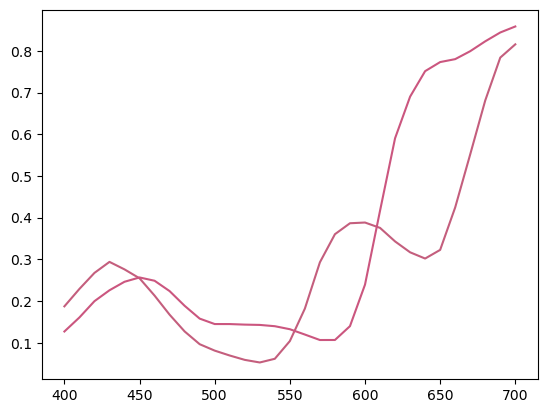

In [43]:
lvtcm_gamut.get_spectra(metamers_ala180[0][1][1]).plot()
lvtcm_gamut.get_spectra(metamers_ala180[0][1][0]).plot()

In [46]:
percentages = np.array(
[
    [0.25, 0.85000000000000009, 0.0, 0.35000000000000003, 0.0],
[0.95000000000000007, 0.15000000000000002, 0.20000000000000001, 0.15000000000000002, 0.30000000000000004],
[0.25, 0.80000000000000004, 0.050000000000000003, 0.25, 0.0],
[0.95000000000000007, 0.050000000000000003, 0.10000000000000001, 0.0, 0.85000000000000009],
[0.25, 0.80000000000000004, 0.0, 0.30000000000000004, 0.0],
[1.0, 0.0, 0.25, 0.050000000000000003, 0.35000000000000003],
[0.20000000000000001, 0.70000000000000007, 0.0, 0.45000000000000001, 0.20000000000000001],
[0.85000000000000009, 0.0, 0.10000000000000001, 0.30000000000000004, 0.95000000000000007],
    [0.55000000000000004, 0.55000000000000004, 0.050000000000000003, 0.25, 0.050000000000000003],
[0.95000000000000007, 0.10000000000000001, 0.10000000000000001, 0.10000000000000001, 0.5],
[0.5, 0.5, 0.0, 0.5, 0.0],
[0.95000000000000007, 0.0, 0.20000000000000001, 0.40000000000000002, 0.10000000000000001],
[0.45000000000000001, 0.65000000000000002, 0.0, 0.45000000000000001, 0.0],
[1.0, 0.10000000000000001, 0.10000000000000001, 0.30000000000000004, 0.40000000000000002],
[0.45000000000000001, 0.60000000000000009, 0.0, 0.45000000000000001, 0.0],
[1.0, 0.0, 0.25, 0.30000000000000004, 0.050000000000000003]
]    
)

In [47]:
percentages

array([[ 0.25,  0.85,  0.  ,  0.35,  0.  ],
       [ 0.95,  0.15,  0.2 ,  0.15,  0.3 ],
       [ 0.25,  0.8 ,  0.05,  0.25,  0.  ],
       [ 0.95,  0.05,  0.1 ,  0.  ,  0.85],
       [ 0.25,  0.8 ,  0.  ,  0.3 ,  0.  ],
       [ 1.  ,  0.  ,  0.25,  0.05,  0.35],
       [ 0.2 ,  0.7 ,  0.  ,  0.45,  0.2 ],
       [ 0.85,  0.  ,  0.1 ,  0.3 ,  0.95],
       [ 0.55,  0.55,  0.05,  0.25,  0.05],
       [ 0.95,  0.1 ,  0.1 ,  0.1 ,  0.5 ],
       [ 0.5 ,  0.5 ,  0.  ,  0.5 ,  0.  ],
       [ 0.95,  0.  ,  0.2 ,  0.4 ,  0.1 ],
       [ 0.45,  0.65,  0.  ,  0.45,  0.  ],
       [ 1.  ,  0.1 ,  0.1 ,  0.3 ,  0.4 ],
       [ 0.45,  0.6 ,  0.  ,  0.45,  0.  ],
       [ 1.  ,  0.  ,  0.25,  0.3 ,  0.05]])

In [ ]:
samples = list(bad_ishi.values())

In [ ]:
from chromalab.inks import find_best_n

In [ ]:
avg_n = 0

for p, s in zip(percentages, samples):
    avg_n += find_best_n(inks25, p, s)


In [ ]:
avg_n / len(samples)

best n = 0.94302270409565558

In [38]:
bad_ishi = {}
with open(f'../data/nix/26badishi.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        bad_ishi[name] = spectra
        

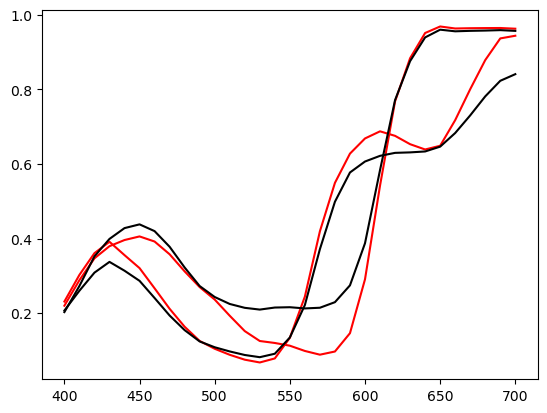

In [48]:
bad_ishi['1out'].plot(color='red')
bad_ishi['1in'].plot(color='red')
lvtcm_gamut.get_spectra((0.25, 0.85, 0, 0.35, 0)).plot(color='black')
lvtcm_gamut.get_spectra([ 0.95,  0.15,  0.2 ,  0.15,  0.3 ]).plot(color='black')

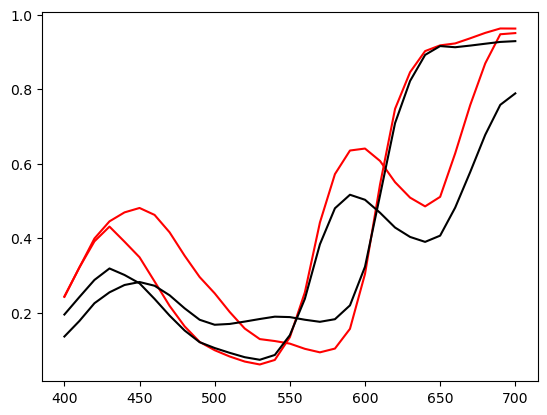

In [40]:
bad_ishi['2out'].plot(color='red')
bad_ishi['2in'].plot(color='red')
lvtcm_gamut.get_spectra(metamers_ala180[1][1][1]).plot(color='black')
lvtcm_gamut.get_spectra(metamers_ala180[1][1][0]).plot(color='black')